In [ ]:
!pip install blocksnet==0.0.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 29.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import geopandas as gpd
import blocksnet as bn

In [ ]:
city = bn.City.from_pickle('city.pickle')

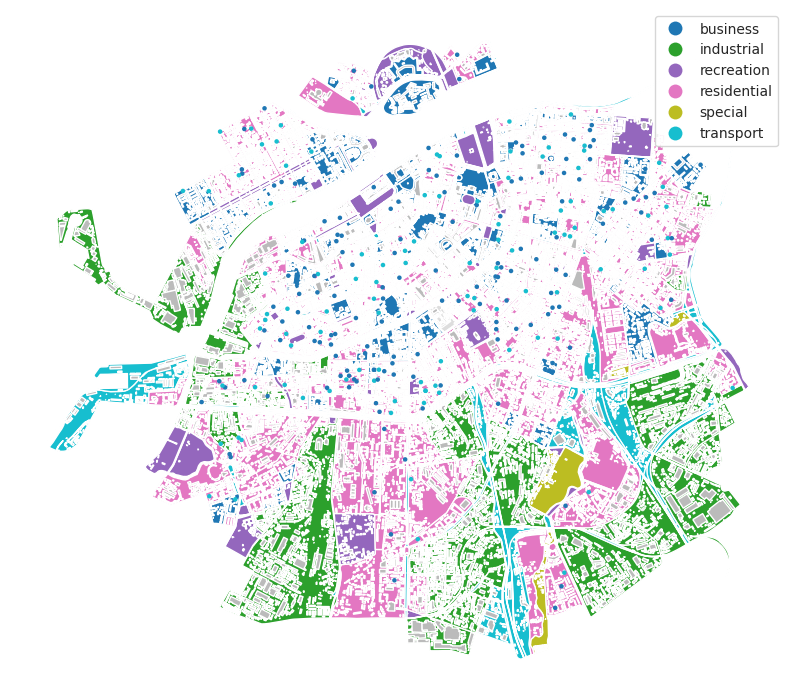

In [ ]:
city.plot()

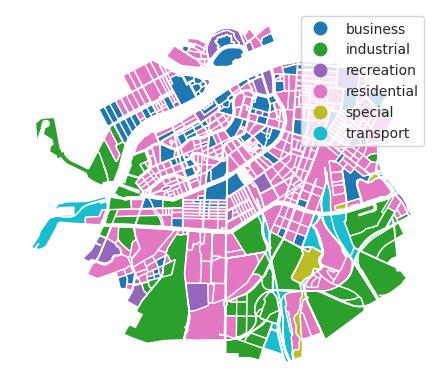

In [ ]:
blocks = city.get_blocks_gdf(simplify=True)
blocks.plot(column='land_use', legend=True).set_axis_off()

In [ ]:
city['school'].land_use

[<LandUse.RESIDENTIAL: 'residential'>, <LandUse.BUSINESS: 'business'>]

In [ ]:
acc = bn.Accessibility(city_model=city)

In [ ]:
acc_gdf = acc.calculate(0); acc_gdf

,id,geometry,accessibility_to,accessibility_from
0,0,"POLYGON ((346322.136 6644661.144, 346320.245 6...",0.0,0.0
1,1,"POLYGON ((346314.470 6644486.283, 346315.077 6...",17.8,16.8
2,2,"POLYGON ((349432.893 6648677.425, 349450.028 6...",42.8,43.7
3,3,"POLYGON ((349466.669 6648716.319, 349459.119 6...",39.8,41.0
4,4,"POLYGON ((350769.003 6647816.622, 350769.684 6...",43.5,48.3
...,...,...,...,...
2222,2222,"POLYGON ((352668.388 6645858.409, 352668.862 6...",45.4,43.6
2223,2223,"POLYGON ((352668.388 6645858.409, 352668.444 6...",45.4,43.6
2224,2224,"POLYGON ((352688.929 6645759.663, 352691.038 6...",47.9,46.1
2225,2225,"POLYGON ((352691.038 6645783.113, 352691.154 6...",47.9,46.1


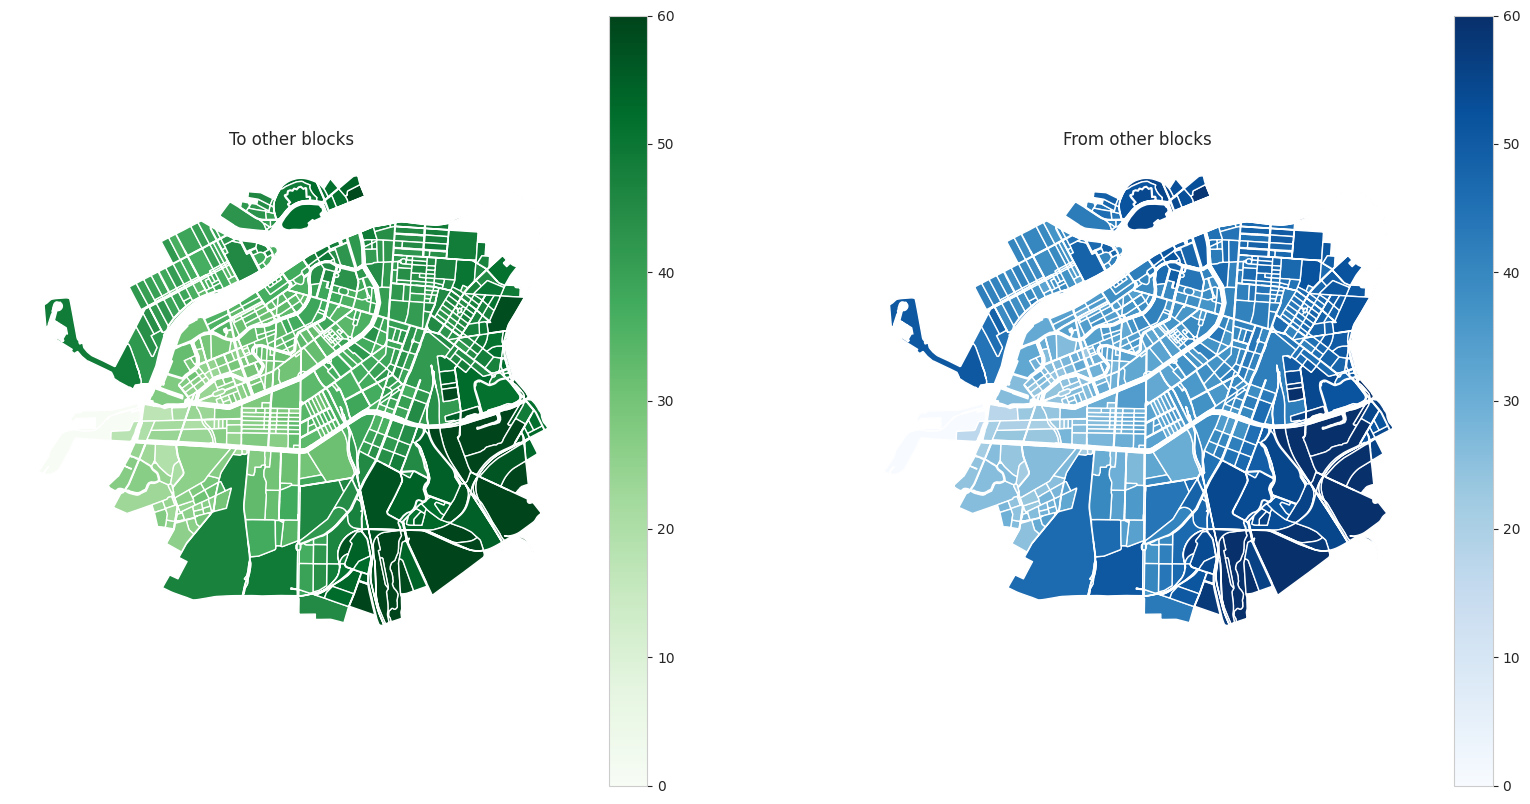

In [ ]:
acc.plot(acc_gdf, figsize=(20,10))

In [ ]:
conn = bn.Connectivity(city_model=city)

In [ ]:
conn_gdf = conn.calculate()
conn_gdf.head()

,geometry,connectivity
id,,
0,"POLYGON ((346322.136 6644661.144, 346320.245 6...",38.4
1,"POLYGON ((346314.470 6644486.283, 346315.077 6...",37.1
2,"POLYGON ((349432.893 6648677.425, 349450.028 6...",34.0
3,"POLYGON ((349466.669 6648716.319, 349459.119 6...",31.6
4,"POLYGON ((350769.003 6647816.622, 350769.684 6...",34.7


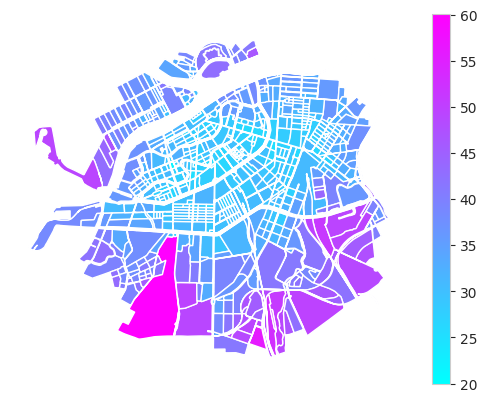

In [ ]:
conn.plot(conn_gdf)

In [ ]:
cent = bn.Centrality(city_model=city)

In [ ]:
cent_gdf = cent.calculate()
cent_gdf.head()

,geometry,connectivity,density,diversity,centrality
id,,,,,
0,"POLYGON ((346322.136 6644661.144, 346320.245 6...",38.4,NaN,NaN,NaN
1,"POLYGON ((346314.470 6644486.283, 346315.077 6...",37.1,NaN,NaN,NaN
2,"POLYGON ((349432.893 6648677.425, 349450.028 6...",34.0,NaN,NaN,NaN
3,"POLYGON ((349466.669 6648716.319, 349459.119 6...",31.6,NaN,NaN,NaN
4,"POLYGON ((350769.003 6647816.622, 350769.684 6...",34.7,NaN,NaN,NaN


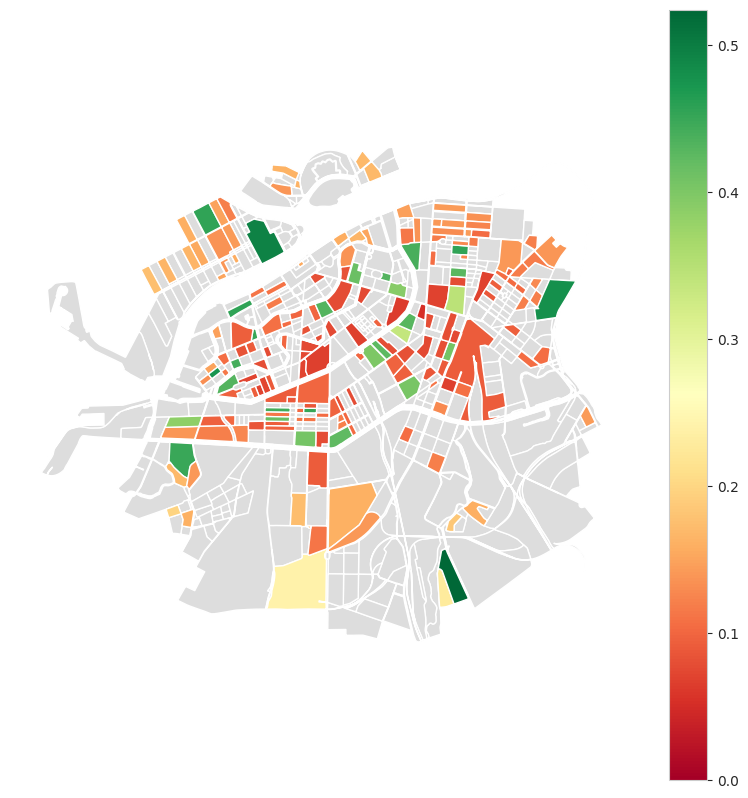

In [ ]:
cent.plot(cent_gdf)

In [ ]:
for service_type in city.service_types:
  try:
    gdf = gpd.read_parquet(f'{service_type.name}.parquet').to_crs(city.crs)
    gdf['area'] = gdf.geometry.area
    gdf.geometry = gdf.geometry.representative_point()
    city.update_services(service_type, gdf)
  except Exception as e:
    print(e)

school.parquet
kindergarten.parquet
hospital.parquet
polyclinic.parquet
pitch.parquet
swimming_pool.parquet
stadium.parquet
theatre.parquet
museum.parquet
cinema.parquet
mall.parquet
convenience.parquet
supermarket.parquet
cemetery.parquet
religion.parquet
market.parquet
bowling_alley.parquet
university.parquet
playground.parquet
pharmacy.parquet
fuel.parquet
beach.parquet
train_building.parquet
bank.parquet
lawyer.parquet
cafe.parquet
subway_entrance.parquet
multifunctional_center.parquet
hairdresser.parquet
restaurant.parquet
bar.parquet
park.parquet
government.parquet
recruitment.parquet
hotel.parquet
zoo.parquet
circus.parquet
post.parquet
police.parquet
dog_park.parquet
hostel.parquet
bakery.parquet
parking.parquet
guest_house.parquet
reserve.parquet
sanatorium.parquet
embankment.parquet
machine-building_plant.parquet
brewery.parquet
woodworking_plant.parquet
oil_refinery.parquet
plant_of_building_materials.parquet
wastewater_plant.parquet
water_works.parquet
substation.parquet
tr

<Axes: >

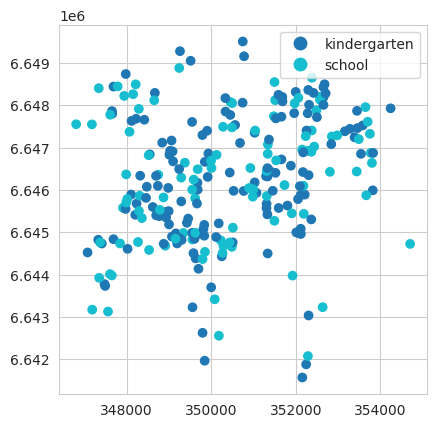

In [ ]:
city.get_services_gdf().plot(column='service_type', legend=True)

In [ ]:
cent_gdf = cent.calculate()
cent_gdf.head()

,geometry,connectivity,density,diversity,centrality
id,,,,,
0,"POLYGON ((346322.136 6644661.144, 346320.245 6...",38.4,NaN,NaN,NaN
1,"POLYGON ((346314.470 6644486.283, 346315.077 6...",37.1,NaN,NaN,NaN
2,"POLYGON ((349432.893 6648677.425, 349450.028 6...",34.0,NaN,NaN,NaN
3,"POLYGON ((349466.669 6648716.319, 349459.119 6...",31.6,NaN,NaN,NaN
4,"POLYGON ((350769.003 6647816.622, 350769.684 6...",34.7,NaN,NaN,NaN


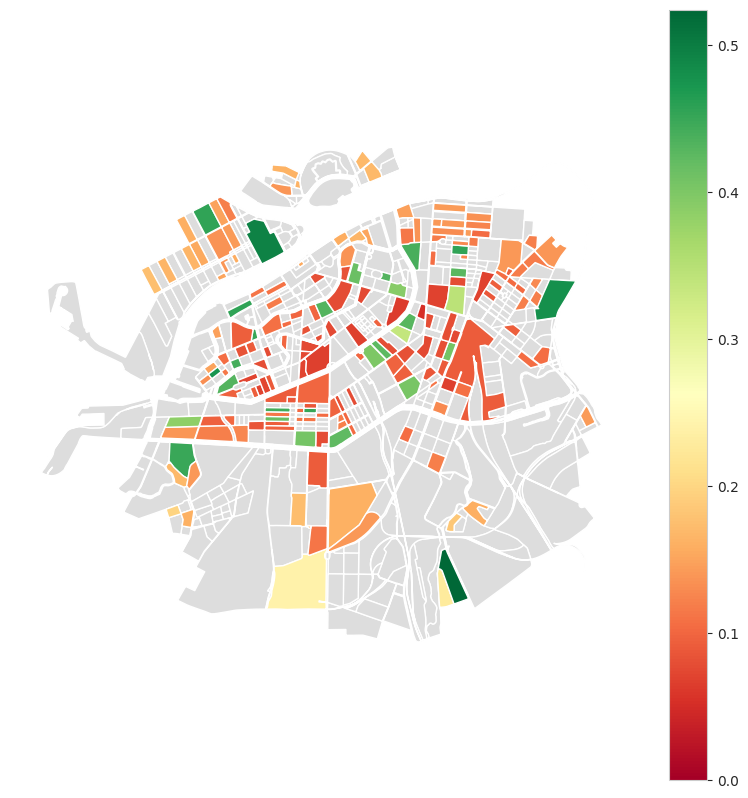

In [ ]:
cent.plot(cent_gdf)